In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")



house=pd.read_csv('house_amesterdam.csv')
house=house.drop("Unnamed: 0",axis=1)
house.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [2]:
             ##exploration donnees ##
print("ligne =>",house.shape[0])
print("colonnes =>",house.shape[1])


ligne => 924
colonnes => 7


valeurs manquantes ==> 
Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64


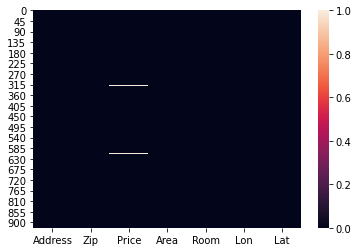

In [3]:
import seaborn as sns
sns.heatmap(house.isna())
print("valeurs manquantes ==> ")
print(house.isna().sum())

In [4]:
print(house.dtypes.value_counts())
house.dtypes


float64    3
int64      2
object     2
dtype: int64


Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

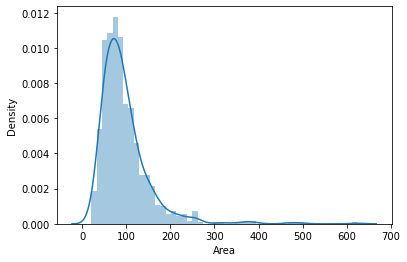

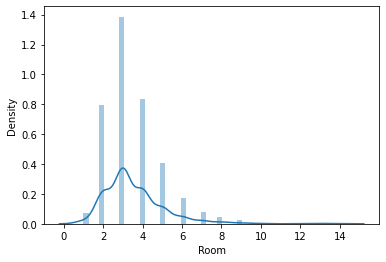

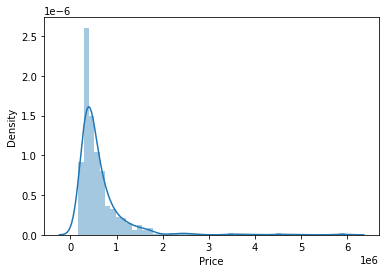

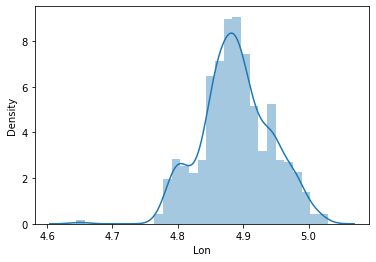

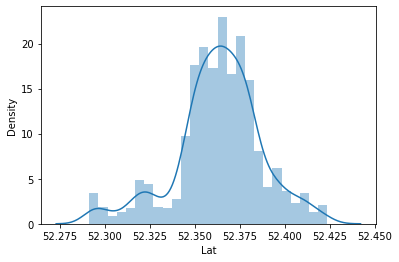

In [7]:
for col in house.select_dtypes('int64'):
    plt.figure()
    sns.distplot(house[col])

for col in house.select_dtypes('float64'):
    plt.figure()
    sns.distplot(house[col])



Price    2.905147e+11
Area     3.300200e+03
Room     2.500000e+00
Lon      0.000000e+00
Lat      0.000000e+00
dtype: float64
          Price      Area      Room       Lon       Lat
Price  1.000000  0.835090  0.623448 -0.013561  0.062196
Area   0.835090  1.000000  0.812421  0.012196  0.017993
Room   0.623448  0.812421  1.000000 -0.036585 -0.016381
Lon   -0.013561  0.012196 -0.036585  1.000000 -0.184436
Lat    0.062196  0.017993 -0.016381 -0.184436  1.000000


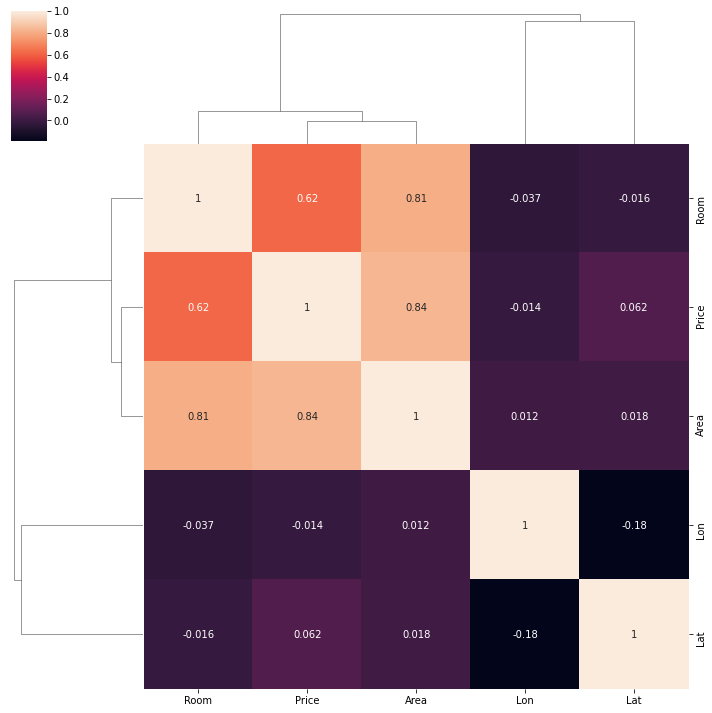

In [87]:
#sns.countplot(house['Room'])
print(round(house.var(),1))
print(house.corr())
#sns.heatmap(house.corr(),annot=True)
sns.clustermap(house.corr(),annot=True)

In [70]:
from sklearn.preprocessing import *
from sklearn.model_selection import *

############# preprocessing ###########

def imputer(data):
    data.dropna(axis=0,inplace=True)
    data1=data.drop(['Address','Zip'],axis=1,inplace=True)
    return data1

def standarisation(data):
    trans=StandardScaler()
    trans.fit(data)
    data1=trans.transform(data)
    
    return data1



def donnees(data):
    imputer(data)
    standarisation(data)
    
    y=data['Price']
    x=data.drop('Price',axis=1)
    
    
    return x,y

x,y=donnees(house)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)



(736, 4)
(736,)
(184, 4)
(184,)


0.7612032440613222

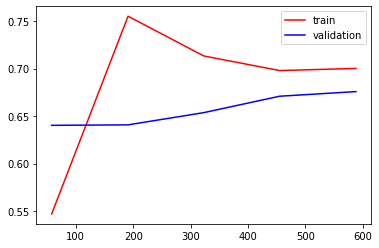

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

def evaluation(modele):
    modele.fit(xtrain,ytrain)
    ypred=modele.predict(xtest)
    score=modele.score(xtest,ytest)
    
    N,train_score,val_score=learning_curve(modele,xtrain,ytrain,train_sizes=np.linspace(0.1,1,5),cv=5)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),c='r',label='train')
    plt.plot(N,val_score.mean(axis=1),c='b',label='validation')
    plt.legend()
    
    return score

evaluation(LinearRegression())